<a href="https://colab.research.google.com/github/Shritej24c/sparkfoundation/blob/main/spark_foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [9]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz


Accuracy: 0.9210526315789473


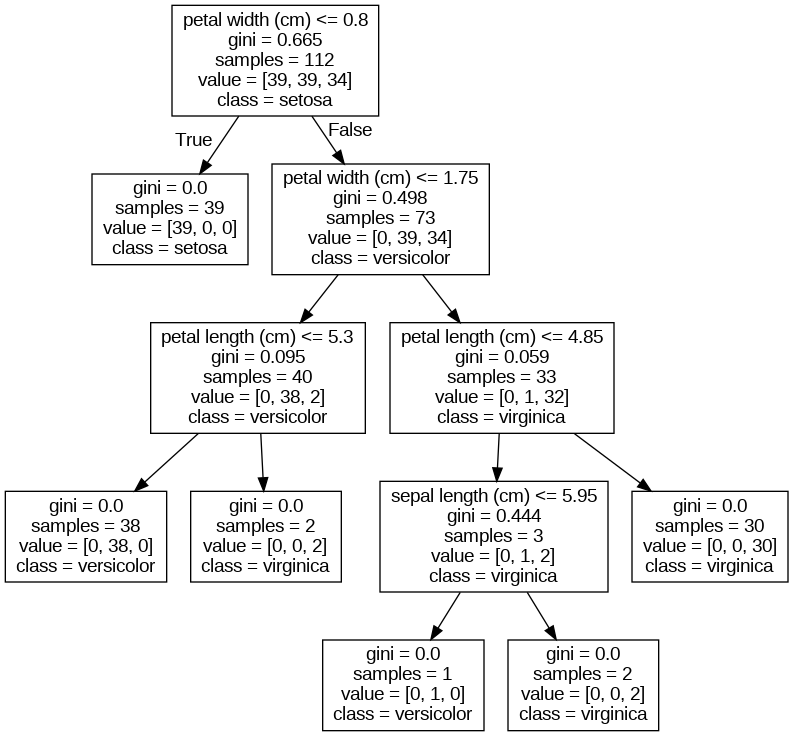

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz

# Load the iris dataset
iris = datasets.load_iris()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)

# Train the decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the decision tree
export_graphviz(clf, out_file='iris_tree.dot', feature_names=iris.feature_names, class_names=iris.target_names)
!dot -Tpng iris_tree.dot -o iris_tree.png

# Display the decision tree image
from IPython.display import Image
Image('iris_tree.png')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

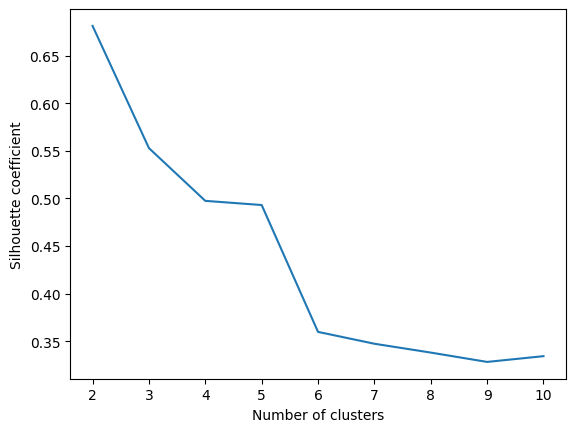

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


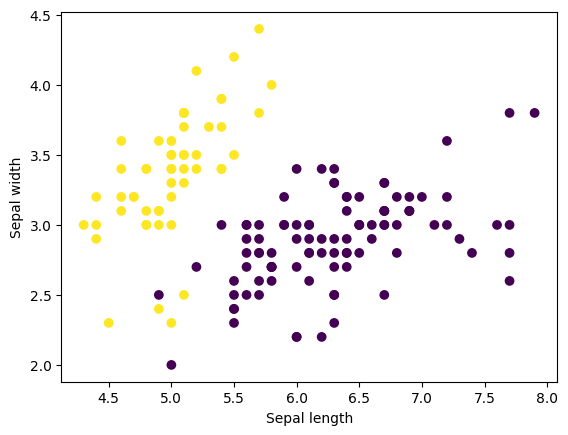

In [7]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

# Create a range of possible number of clusters
num_clusters = range(2, 11)

# Create a list to store the silhouette coefficients for each number of clusters
silhouette_coefficients = []

# For each number of clusters, fit a KMeans model and calculate the silhouette coefficient
for n in num_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(iris.data)
    silhouette_coefficients.append(metrics.silhouette_score(iris.data, kmeans.labels_))

# Plot the silhouette coefficients
plt.plot(num_clusters, silhouette_coefficients)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette coefficient")
plt.show()

# Find the number of clusters with the highest silhouette coefficient
optimal_num_clusters = num_clusters[np.argmax(silhouette_coefficients)]

# Fit a KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters)
kmeans.fit(iris.data)

# Predict the cluster labels for each data point
y_pred = kmeans.predict(iris.data)

# Plot the data points with different colors for each cluster
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=y_pred)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()
